In [2]:
import numpy as np
import pandas as pd

In [ ]:
!python3 -m spacy download en_core_web_sm

In [1]:
# Parameters & Constants
FILE_PATH = '../data/dontpatronizeme_pcl.tsv'

In [3]:
rows = []

with open(FILE_PATH) as f:
    for line in f.readlines()[4:]:
        par_id=line.strip().split('\t')[0]
        art_id = line.strip().split('\t')[1]
        keyword=line.strip().split('\t')[2]
        country=line.strip().split('\t')[3]
        t=line.strip().split('\t')[4]#.lower()
        l=line.strip().split('\t')[-1]
        if l=='0' or l=='1':
            lbin=0
        else:
            lbin=1
        rows.append(
            {'par_id':par_id,
            'art_id':art_id,
            'keyword':keyword,
            'country':country,
            'text':t, 
            'label':lbin, 
            'orig_label':l
            }
            )
df=pd.DataFrame(rows, columns=['par_id', 'art_id', 'keyword', 'country', 'text', 'label', 'orig_label']) 

In [4]:
df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0


In [5]:
# Exploratory Data Analysis

print("Original data shape: ", df.shape)
df = df.dropna()
print("Data shape after dropping NaNs: ", df.shape)

Original data shape:  (10469, 7)
Data shape after dropping NaNs:  (10469, 7)


0    0.905149
1    0.094851
Name: label, dtype: float64


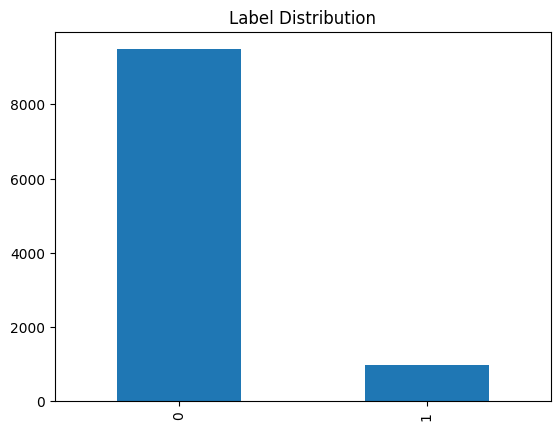

In [8]:
# ## Label Distribution
df.label.value_counts().plot(kind='bar', title='Label Distribution')

# Calculate percentage of each class
print(df.label.value_counts(normalize=True))

We can see that the dataset is imbalanced, with an approximate ratio of 9:1.

## Which features seem to affect the prediction?

### 1. Length of text

### 2. Country

### 3. Keyword

label
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: text_length, dtype: object

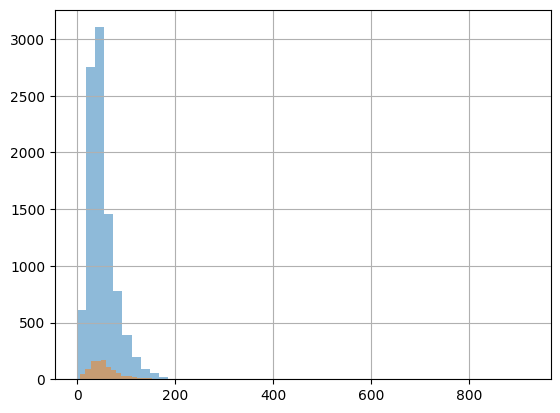

In [16]:
import spacy

spacy_en = spacy.load('en_core_web_sm')

def tokenizer(text): # create a custom tokenizer function
    return [tok.text for tok in spacy_en.tokenizer(text)]

df['text_tokenised'] = df['text'].apply(tokenizer)
df['text_length'] = df['text_tokenised'].apply(len)

# Plot the distribution of text length per label
df.groupby('label').text_length.hist(alpha=0.5, bins=50)

In [19]:
df['text_tokenised'].head()

0    [We, 're, living, in, times, of, absolute, ins...
1    [In, Libya, today, ,, there, are, countless, n...
2    [", White, House, press, secretary, Sean, Spic...
3    [Council, customers, only, signs, would, be, d...
4    [", ", ", Just, like, we, received, migrants, ...
Name: text_tokenised, dtype: object

<AxesSubplot: title={'center': 'Label Distribution by Keyword'}, xlabel='keyword'>

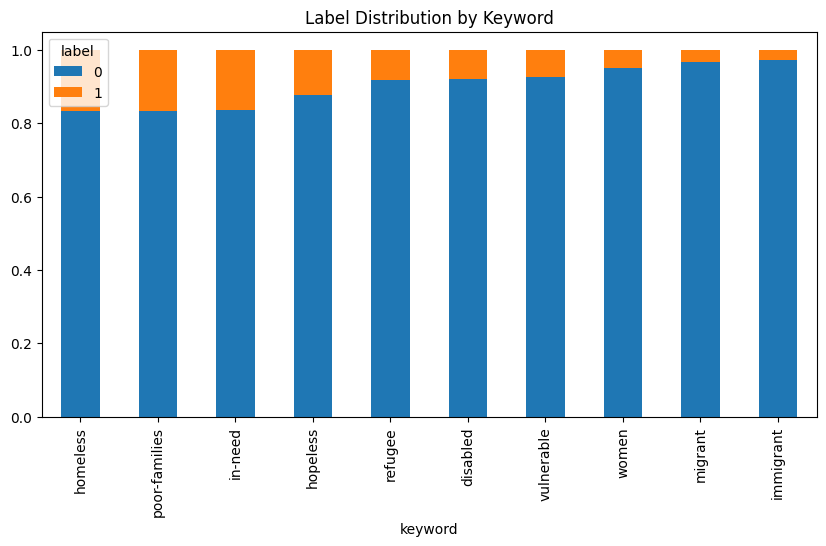

In [38]:
# Visualize the ratio between 0 and 1 labels for each keyword, and order them by the ratio of 1 labels
df.groupby('keyword').label.value_counts(normalize=True).unstack().sort_values(by=1, ascending=False).plot(kind='bar', stacked=True, figsize=(10, 5), title='Label Distribution by Keyword')

<AxesSubplot: title={'center': 'Label Distribution by Country'}, xlabel='country'>

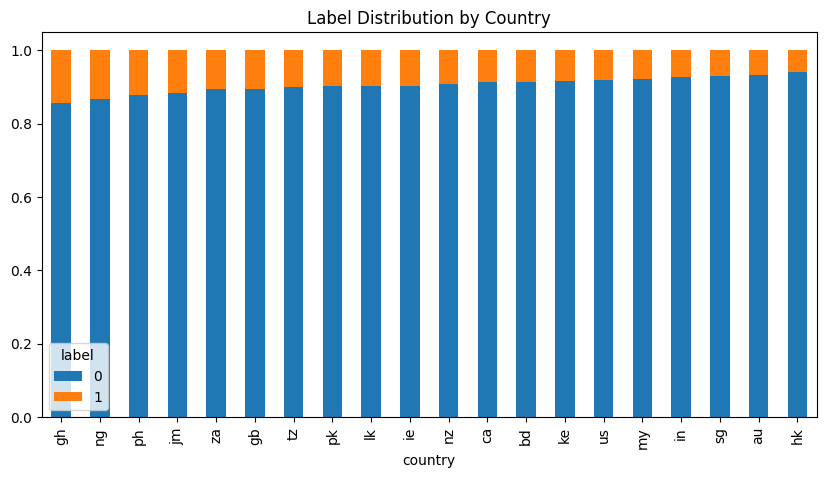

In [39]:
df.groupby('country').label.value_counts(normalize=True).unstack().sort_values(by=1, ascending=False).plot(kind='bar', stacked=True, figsize=(10, 5), title='Label Distribution by Country')